In [138]:
import numpy as np
import scipy as sp
import keras
import matplotlib.pyplot as plt

import os
import sys

from scipy import io as spio
from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from train_color_shape import preprocess_input, postprocess_input, get_image_data_generator
from train_color_shape import get_model

In [139]:
# Load the model from weights!
model = get_model()
model.load_weights("model_weights_8200.h5")

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 95, 95, 32)        896       
_________________________________________________________________
batch_normalization_36 (Batc (None, 95, 95, 32)        128       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 95, 95, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 95, 95, 32)        128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 95, 95, 32)        25632     
_________________________________________________________________
batch_normalization_38 (Batc (None, 95, 95, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 47, 47, 32)       

In [140]:
INPUT_SHAPE = (95, 95)


def generate_labeled_images(image_dir):
    for label in os.listdir(image_dir):
        label_dir = os.path.join(image_dir, label)
        for fn in os.listdir(label_dir):
            image_path = os.path.join(label_dir, fn)
            yield load_image(image_path), label


def load_image(image_path):
    keras.preprocessing.image.load_img(
        img_path,
        grayscale=False,
        color_mode='rgb',
        target_size=INPUT_SHAPE,
        interpolation='nearest'
    )

    np_img = np.array(img)
    return np_img


"""
def get_image_data_generator(image_dir, batch_size=None):

    datagen = ImageDataGenerator(
        #        preprocessing_function=preprocess_input,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    return datagen.flow_from_directory(
        image_dir,
        target_size=INPUT_SHAPE,
        batch_size=batch_size or 20,
        # class_mode="categorical"
    )
"""


# IMAGE_DIR = "../data/set-cards-ktreleav-fully-labeled/train/"
IMAGE_DIR = "../src/color-shape/train"

LABELS = os.listdir(IMAGE_DIR)
            
LABEL_MAP = {
    k: dirname
    for k, dirname in enumerate(LABELS)
}        

LABEL_REVERSE_LOOKUP = {
    label: k for k, label in enumerate(LABELS)
}

n = len(LABELS)
confusion = np.zeros((n, n))


def classify(image_batch):
    pp = preprocess_input
    # pp = lambda x: x

    posts = model.predict(pp(image_batch))
    return np.argmax(posts, axis=1)


if False:
    # Demo: See some of the images in a class
    class_index = 6
    image_indices = np.argwhere(y_train == class_index)[:10][:,0]

    for i in image_indices:
        plt.imshow(train_images[i,:,:].transpose(), cmap="gray")
        plt.show()
        # y_train[n][0]

        
def take(it, n):
    iterator = iter(it)
    for i in range(n):
        yield next(iterator)

        
def to_cat(data_generator):
    for batch, labels in data_generator:
        yield batch, np.argmax(labels, axis=1)

In [164]:
"""Generate a confusion matrix."""
if True:
    datagen = take(to_cat(get_image_data_generator(IMAGE_DIR, 32)), 10)
    # datagen = take(to_cat(get_image_data_generator(IMAGE_DIR, 32)), 1)
else:

    def generate_image_data():
        for np_image, label in get_labeled_images(IMAGE_DIR):
            batch = np_image.reshape((1, 95, 95, 3))
            labels = np.array([LABEL_REVERSE_LOOKUP[label]])
            yield batch, labels

    datagen = generate_image_data()

Found 309 images belonging to 9 classes.


In [165]:
for batch, labels in datagen:
    batch_ = postprocess_input(batch)
    labels_ = classify(batch_)
    confusion[labels, labels_] += 1

In [166]:
confusion

array([[ 3.,  0.,  0.,  9.,  0.,  0.,  9.,  6.,  0.],
       [ 1.,  0.,  5.,  9.,  0.,  0., 11.,  4.,  0.],
       [ 0.,  0.,  6.,  9.,  0.,  3., 10.,  3.,  0.],
       [ 4.,  0.,  2., 10.,  0.,  0.,  9.,  1.,  0.],
       [ 5.,  0.,  5.,  8.,  0.,  2., 10.,  4.,  0.],
       [ 2.,  0.,  7.,  8.,  0.,  2., 10.,  4.,  0.],
       [ 6.,  0.,  4.,  7.,  0.,  1., 10.,  3.,  0.],
       [ 1.,  0.,  7.,  8.,  0.,  2., 11.,  5.,  0.],
       [ 2.,  0.,  4.,  7.,  0.,  4., 10.,  5.,  0.]])

In [160]:
datagen = take(to_cat(get_image_data_generator(IMAGE_DIR, 32)), 1)
# datagen = get_image_data_generator(IMAGE_DIR, 1)

if False:
    batch, labels = next(datagen)

    img = postprocess_input(batch[0,:,:,:])
    plt.imshow(img); plt.show()

Found 309 images belonging to 9 classes.


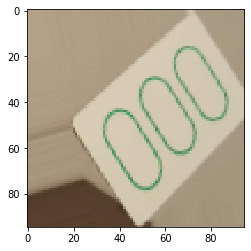

green-oval


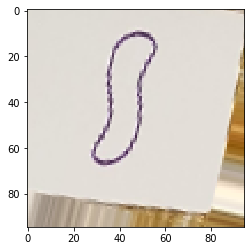

red-oval


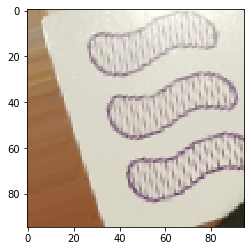

red-oval


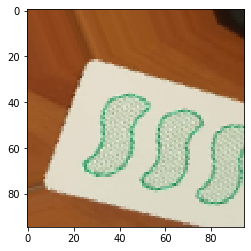

purple-diamond


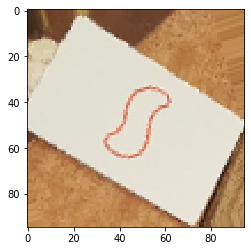

red-squiggle


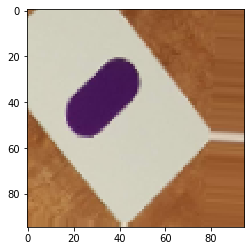

red-squiggle


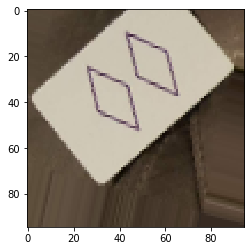

green-oval


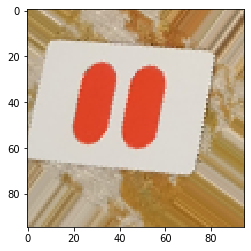

red-oval


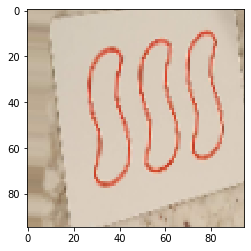

green-oval


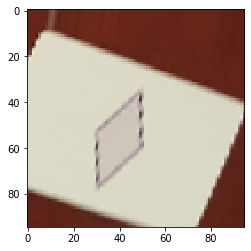

green-oval


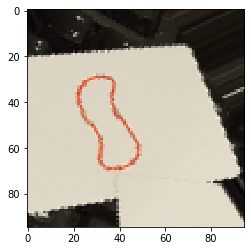

green-oval


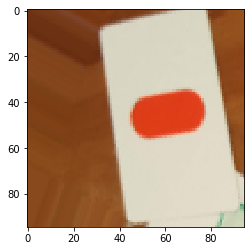

purple-oval


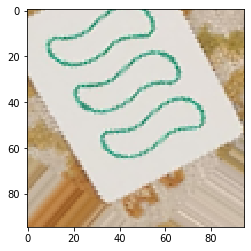

green-diamond


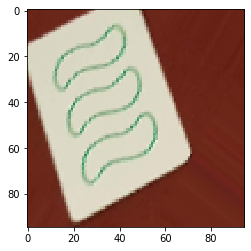

red-oval


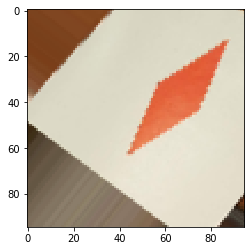

red-oval


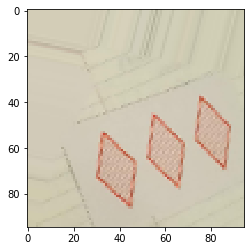

green-diamond


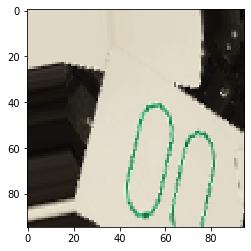

green-oval


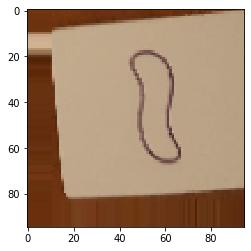

red-oval


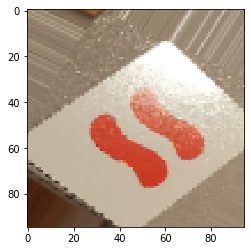

red-oval


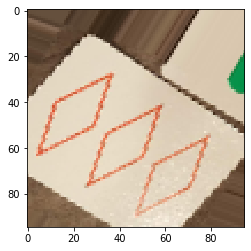

green-oval


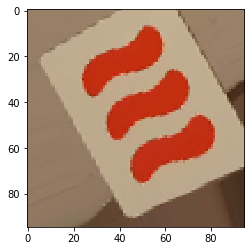

red-oval


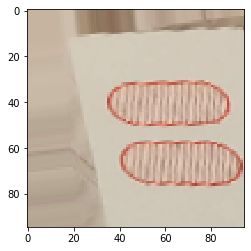

green-oval


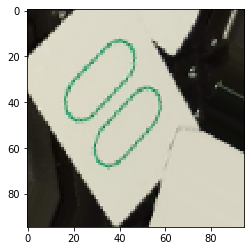

green-oval


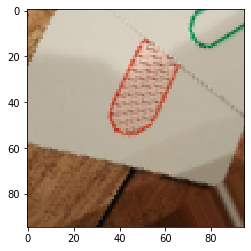

green-oval


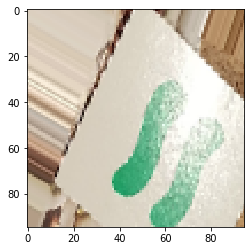

purple-oval


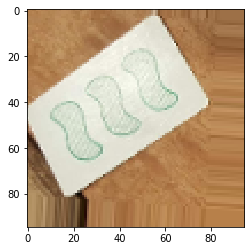

red-oval


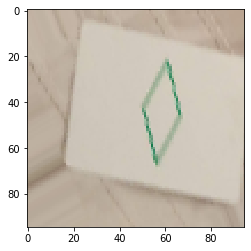

red-oval


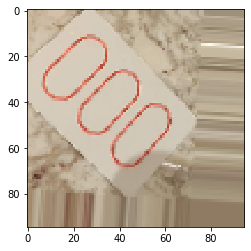

green-oval


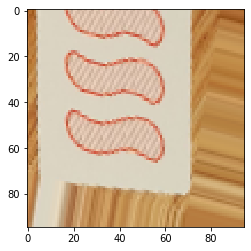

green-oval


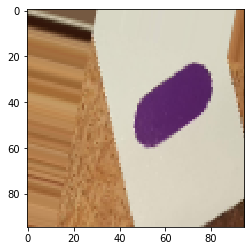

green-oval


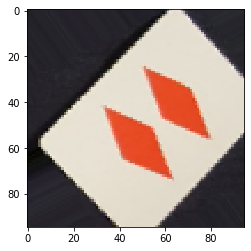

red-oval


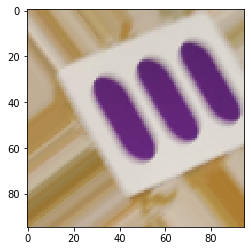

red-oval


In [159]:
if True:
    batch, labels = next(datagen)

    # labels_ = classify(batch)
    
    if True:
        batch_ = postprocess_input(batch)
    else:
        batch_ = batch
    
    labels_ = classify(batch_)
        
    for k in range(batch_.shape[0]):
        plt.imshow(batch_[k,:,:,:]); plt.show()
        print(LABELS[labels_[k]])

In [96]:
LABELS

['purple-oval',
 'red-diamond',
 'red-oval',
 'green-oval',
 'green-squiggle',
 'green-diamond',
 'purple-diamond',
 'red-squiggle',
 'purple-squiggle']

## (a) Write a function using Keras that creates a CNN model (using the Sequential API)

1. Conv2D – 32 feature maps, 3x3 kernels, ReLU activation BatchNorm
1. Conv2D – 32 feature maps, 3x3 kernels, ReLU activation BatchNorm
1. Conv2D – 32 feature maps, 5x5 kernels, ReLU activation BatchNorm
1. MaxPooling – stride 2
1. Dropout – rate 0.5
1. Conv2D – 64 feature maps, 3x3 kernels, ReLU activation BatchNorm
1. Conv2D – 64 feature maps, 3x3 kernels, ReLU activation BatchNorm
1. Conv2D – 64 feature maps, 5x5 kernels, ReLU activation BatchNorm
1. Max Pooling – stride 2
1. Dropout – rate 0.5
1. Conv2D – 128 feature maps, 5x5 kernels, ReLU activation BatchNorm
1. Flatten
1. Dropout – rate 0.5
1. Dense – Softmax activation

## (b) Write code in Keras to train the model for 20 epochs. Summarize the model to visualize the tensors at different processing stages.

In [5]:
from keras import optimizers
from keras.utils import to_categorical

my_optimizers = [
    "rmsprop",
    optimizers.RMSprop(lr=1e-4),
]

opts = dict(
    metrics=["acc"]
)

model = get_model()
model.compile(optimizer=my_optimizers[0], loss='categorical_crossentropy', **opts)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)       

In [8]:
model.save("model_weights.h5")
model_json = model.to_json()
from keras.models import model_from_json

model_ = model_from_json(model_json)
model_.load_weights("model_weights.h5")
model_.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)       

## (c.1) Train the model.

In [9]:
# N = 100
N = train_images.shape[0]
print(N)
batch_size = 100
epochs = 1
validation_split = 0.1

train_images_ = train_images[:N]
train_labels_ = train_labels[:N]
train_labels_categorical = to_categorical(train_labels_ - 1)

test_labels_categorical = to_categorical(test_labels - 1)

history = model.fit(
    train_images_,
    train_labels_categorical,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_images, test_labels_categorical)
)

124800
Train on 124800 samples, validate on 20800 samples
Epoch 1/1
124800/124800 [==============================] - 939s 8ms/step - loss: 0.6166 - acc: 0.8376 - val_loss: 0.3008 - val_acc: 0.9153


## (c.2) Plot the learning curves that include the training and validation losses and accuracies as a function of epoch. Report the final training and test accuracies.

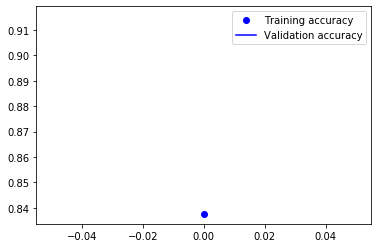

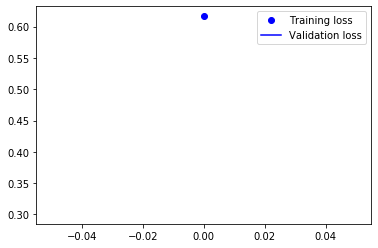

final training acc: [0.8375962]
final validation acc: [0.915336549282074]


In [11]:
import matplotlib.pyplot as plt

"""
    model_ = model_from_json(model_json)
    model_.load_weights("model_weights.h5")
    model_.summary()
"""


def plot_history(history):
    acc = history.history["acc"]
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    plt.plot(acc, "bo", label="Training accuracy")
    plt.plot(val_acc, "b", label="Validation accuracy")
    plt.legend()

    plt.figure()
    plt.plot(loss, "bo", label="Training loss")
    plt.plot(val_loss, "b", label="Validation loss")
    plt.legend()

    plt.show()
    

plot_history(history)
print("final training acc:", history.history["acc"])
print("final validation acc:", history.history["val_acc"])

## (d.1) Using data augmentation, re-train the same network architecture.

(REMARK: You will have to write code to make folders for each class in order to use the ImageDataGenerator module in Keras to perform the data augmentation.)

The parameters for data augmentation should include image rotation, zoom, shifts in width and height, shearing, and horizontal flip.

In [12]:
from keras.preprocessing.image import ImageDataGenerator


def get_image_data_generator(image_dir, batch_size=None):

    datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    return datagen.flow_from_directory(
        image_dir,
        color_mode="grayscale",
        target_size=(28,28),
        batch_size=batch_size or 20,
        class_mode="categorical"
    )

In [13]:
n_train = train_images_.shape[0]
batch_size = 100
steps_per_epoch = n_train / batch_size
validation_steps = 50
n_epochs = 1

train_generator = get_image_data_generator("images/train", batch_size)
validation_generator = get_image_data_generator("images/test", batch_size)

if False:
    images_, labels_ = next(test_generator)
    images_.shape, labels_.shape

if True:
    history_aug = model.fit_generator(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=n_epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps
    )

Found 124800 images belonging to 26 classes.
Found 20800 images belonging to 26 classes.
Epoch 1/1
 874/1248 [====================>.........] - ETA: 8:11 - loss: 1.9437 - acc: 0.4774

KeyboardInterrupt: 

## (d.2)  Plot the learning curves. Report the final training and testing accuracies. How are they different than before?

In [ ]:
plot_history(history_aug)

## (e) Plot the confusion matrix. (Hint: Use scikit-learn package: sklearn.metrics.confusion_matrix) Report any large sources of confusion and explain.

In [75]:
train_predicted_categorical = model.predict(train_images_)
train_predicted = np.argmax(train_predicted_categorical, axis=1) + 1

import sklearn.metrics
print(sklearn.metrics.confusion_matrix(train_labels_, train_predicted))

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0]
 [0 3 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 1 0 4 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 

Conclusion